# Regression in Scikit Learn
## Machine Learning


In [1]:
pip install scikit-learn

SyntaxError: invalid syntax (727830033.py, line 2)

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pyplot

# other 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LinearRegression


In [3]:
#  load dataset
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [13]:
df_linear = df[["age","fare"]]

In [7]:
# simple linear regression
x = df[['age']]
y = df['fare']

In [9]:
x.isnull().sum() /len(x) * 100

age    19.86532
dtype: float64

In [14]:
df_linear.age.fillna(value=x['age'].mean(), inplace=True)

C:\Users\Afzaa\AppData\Local\Temp\ipykernel_3360\3684289183.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_linear.age.fillna(value=x['age'].mean(), inplace=True)


In [11]:
x

,age
0,22.000000
1,38.000000
2,26.000000
3,35.000000
4,35.000000
...,...
886,27.000000
887,19.000000
888,29.699118
889,26.000000


In [15]:
df_linear.isnull().sum() /len(x) * 100

age     0.0
fare    0.0
dtype: float64

c:\Users\Afzaa\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


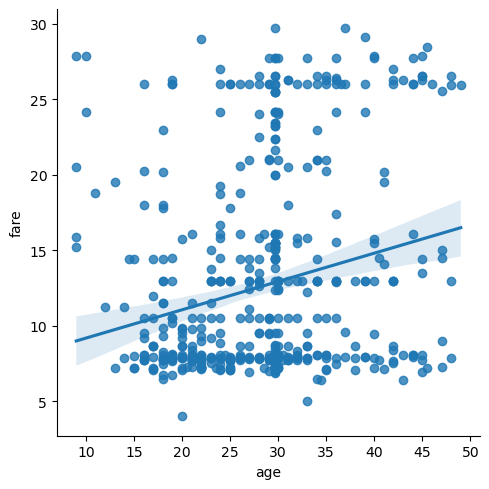

In [28]:
# plot
sns.lmplot(data=df_linear, x='age', y='fare')

<Axes: ylabel='age'>

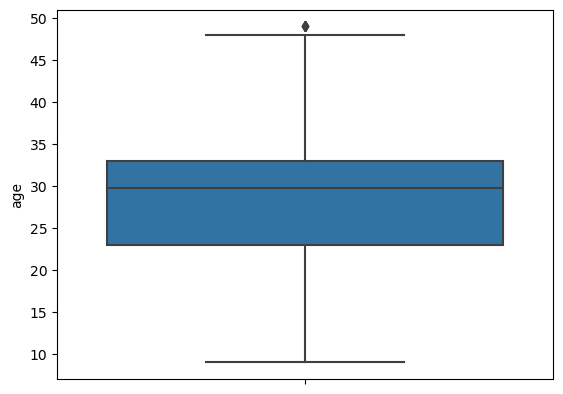

In [21]:
# Boxplot
sns.boxplot(data=df_linear, y='age')

In [20]:
df_linear = df_linear[(df_linear['age'] > 8) & (df_linear['age'] < 50)]

<Axes: ylabel='fare'>

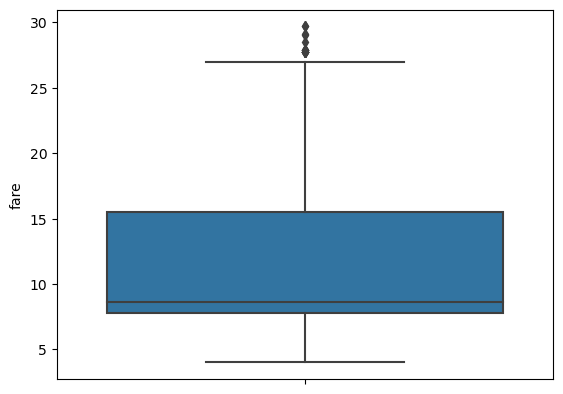

In [72]:
sns.boxplot(data=df_linear, y='fare')

In [71]:
df_linear = df_linear[(df_linear['fare'] > 1) & (df_linear['fare'] < 30)]

In [73]:
x = df_linear[['age']]
y = df_linear['fare']

In [74]:
# model calling (Linear Regression)
model = LinearRegression()

# train the model
model.fit(x,y)

# prediction
model.predict([[55]])

c:\Users\Afzaa\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([17.6283105])

In [75]:
# model evaluation with metrics
# r2
# mean squared error
# MAE
# RMSE

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8 )

# model 
model = LinearRegression()

# train
model.fit(x_train, y_train)

# prediction
predictions = model.predict(x_test)



<Axes: xlabel='fare'>

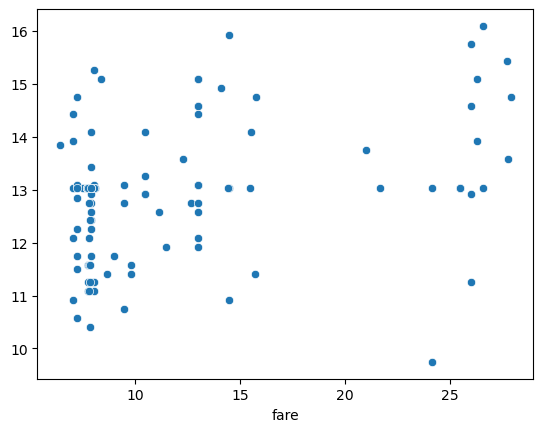

In [76]:
# compare
sns.scatterplot(x=y_test, y=predictions)

In [77]:
model.score(x_test, y_test)

0.07225498072805259

In [81]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
MAE = mean_absolute_error(y_true=y_test, y_pred=predictions)
MSE = mean_squared_error(y_true=y_test, y_pred=predictions)
RMSE = mean_squared_error(y_true=y_test, y_pred=predictions, squared=True)
RS =  r2_score(y_true=y_test, y_pred=predictions)

print("MAE", MAE)
print("MSE", MSE)
print("RMSE", RMSE)
print("R_squared", RS)

MAE 5.020373073581901
MSE 37.99449113943736
RMSE 37.99449113943736
R_squared 0.07225498072805259


In [82]:
import numpy as np
RMSE = np.sqrt(MSE)
RMSE


6.16396715917901